In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import utils as u
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC

In [22]:
#Dataset
df = pd.read_csv("../Resources/online_gaming_behavior_dataset.csv")
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [24]:
df = u.preprocess_and_clean(df)

In [25]:
# Define target vector
y = df["InGamePurchases"]
X = df.drop(columns="InGamePurchases")

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# StandardScater model and fit
X_scaler = StandardScaler()
X_scaler.fit(X_train)

#Transform trainnig and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.683
k: 3, Train/Test Score: 0.840/0.739
k: 5, Train/Test Score: 0.814/0.763
k: 7, Train/Test Score: 0.806/0.777
k: 9, Train/Test Score: 0.802/0.786
k: 11, Train/Test Score: 0.801/0.788
k: 13, Train/Test Score: 0.800/0.791
k: 15, Train/Test Score: 0.801/0.793
k: 17, Train/Test Score: 0.800/0.795
k: 19, Train/Test Score: 0.800/0.795


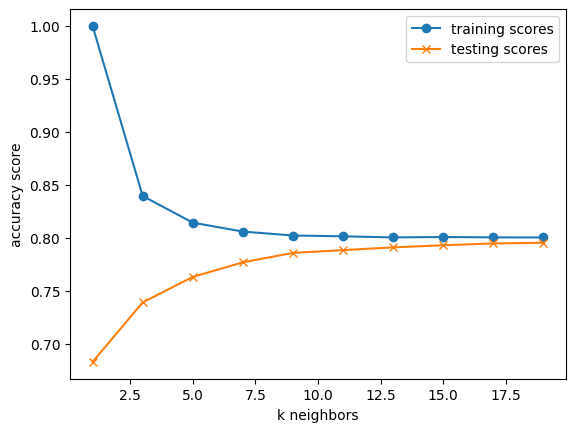

In [26]:
#Loop through k values for accuracy.
train_scores = []
test_scores = []
inertias = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()


### Test One Results
k: 1, Train/Test Score: 1.000/0.683
k: 3, Train/Test Score: 0.839/0.739
k: 5, Train/Test Score: 0.814/0.763
k: 7, Train/Test Score: 0.806/0.777
k: 9, Train/Test Score: 0.802/0.786
k: 11, Train/Test Score: 0.801/0.788
k: 13, Train/Test Score: 0.800/0.791
k: 15, Train/Test Score: 0.801/0.793
k: 17, Train/Test Score: 0.800/0.795
k: 19, Train/Test Score: 0.800/0.795
---
### Test Two Results
k: 1, Train/Test Score: 1.000/0.683
k: 3, Train/Test Score: 0.839/0.739
k: 5, Train/Test Score: 0.814/0.763
k: 7, Train/Test Score: 0.806/0.777
k: 9, Train/Test Score: 0.802/0.786
k: 11, Train/Test Score: 0.801/0.788
k: 13, Train/Test Score: 0.800/0.791
k: 15, Train/Test Score: 0.801/0.793
k: 17, Train/Test Score: 0.800/0.795
k: 19, Train/Test Score: 0.800/0.795
---
### Test Three Results
k: 1, Train/Test Score: 1.000/0.683
k: 3, Train/Test Score: 0.840/0.739
k: 5, Train/Test Score: 0.814/0.763
k: 7, Train/Test Score: 0.806/0.777
k: 9, Train/Test Score: 0.802/0.786
k: 11, Train/Test Score: 0.801/0.788
k: 13, Train/Test Score: 0.800/0.791
k: 15, Train/Test Score: 0.801/0.793
k: 17, Train/Test Score: 0.800/0.795
k: 19, Train/Test Score: 0.800/0.795

In [7]:
# Initialize variables
k_values = range(1, 21)
accuracy_scores = []

# Iterate over different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Find best K value
best_k = np.argmax(accuracy_score) + 1
print(f"Best K value: {best_k}")

Best K value: 1


In [8]:
# KNN model training with best k value
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.786


In [35]:
### Just one example of how we resampled and scaled the data.
### We also used many other models such as cluster centroids, SMOTE, RandomOverSampling
### And RandomUnderSampling. We removed the others as not to clutter the notebook.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

### Create and apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create and apply SMOTEEN to scaled features and training y data
### Resampling
smoteenn = RandomUnderSampler(random_state=7)

### SMOTE, SMOTEENN, ClusterCentroids, RandomOverSampling, RandomUnderSampling

X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

In [36]:
### Create a logistic regression model
### 7 models: Base model, Standardized model, 5 sample models
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_resampled, y_resampled)

knn.fit(X_train, y_train)
print (u.eval_model(knn,X_test,y_test))
### BASE MODEL ^

knn.fit(X_train_scaled, y_train)
print (u.eval_model(knn,X_test_scaled,y_test))
### Scaled model ^

knn.fit(X_resampled, y_resampled)
print (u.eval_model(knn,X_test_scaled,y_test))
### Resampled models ^, do 5 times for each resampled model.

Accuracy Score: 0.7939854131281846
Confusion Matrix:
[[7897  139]
 [1923   50]]
Balanced Accuracy Score: 0.5040224779167846
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8036
           1       0.26      0.03      0.05      1973

    accuracy                           0.79     10009
   macro avg       0.53      0.50      0.47     10009
weighted avg       0.70      0.79      0.72     10009

None
Accuracy Score: 0.7885902687581177
Confusion Matrix:
[[7856  180]
 [1936   37]]
Balanced Accuracy Score: 0.4981769820904763
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8036
           1       0.17      0.02      0.03      1973

    accuracy                           0.79     10009
   macro avg       0.49      0.50      0.46     10009
weighted avg       0.68      0.79      0.71     10009

None
Accuracy Score: 0.5027475272254971
Confusi

In [37]:
# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
u.eval_model(knn,X_test_scaled,y_test)

Accuracy Score: 0.5027475272254971
Confusion Matrix:
[[4072 3964]
 [1013  960]]
Balanced Accuracy Score: 0.4966442191082854
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.51      0.62      8036
           1       0.19      0.49      0.28      1973

    accuracy                           0.50     10009
   macro avg       0.50      0.50      0.45     10009
weighted avg       0.68      0.50      0.55     10009



In [27]:
### Accuracies according to above cell, were all calculated manually.
### Put down accuracies into dictionary
accuracies_dict_lr = {'knn_base': .504,
                    'knn_base_scaled':.789,
                    'knn_SMOTEENN' : .197,
                   'knn_SMOTE': .5015,
                   'knn_ClusterCentroids': .520,
                   'knn_RandomOverSampler': .531,
                   'knn_RandomUnderSampler': .503}